<a href="https://colab.research.google.com/github/Erofaxxx/Google_Colab/blob/main/ml_neichev/lab01_ml_vs_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment 01
## Data preprocessing, model training and evaluation

This lab assignment consists of several parts.

In this part you are supposed to work with tabular data: make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [93]:
!pip install ucimlrepo

In [95]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [96]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [97]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

(846, 18) (846, 1)


### 1.1 Data integrity

Check if data is valid. If it is not, remove invalid parts.


In [98]:
# Тута я смотрю какие пропущены могут быть values
print("Missing values in features:")
print(data.isnull().sum())
print("\nMissing values in target:")
print(target.isnull().sum())



# Тут чекаем на duplicates
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")



# Чекаем типы данных
print("\nData types:")
print(data.dtypes)



#удаляем строки с пропущенными values если таковые имеются
data_clean = data.dropna()
target_clean = target.loc[data_clean.index]



print(f"\nData shape after cleaning: {data_clean.shape}, Target shape: {target_clean.shape}")






Missing values in features:
COMPACTNESS                         1
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR.AXIS RECTANGULARITY              0
MAX.LENGTH RECTANGULARITY           0
SCALED VARIANCE ALONG MAJOR AXIS    0
SCALED VARIANCE ALONG MINOR AXIS    0
SCALED RADIUS OF GYRATION           0
SKEWNESS ABOUT MAJOR AXIS           0
SKEWNESS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MAJOR AXIS           0
HOLLOWS RATIO                       0
dtype: int64

Missing values in target:
class    0
dtype: int64

Number of duplicate rows: 0

Data types:
COMPACTNESS                         float64
CIRCULARITY                           int64
DISTANCE CIRCULARITY                  int64
RADIUS RATIO                          int64
PR.AXI

### 1.2 Train and test sets

Split data into 2 groups using `sklearn`'s infrastructure.

Which size of test set to choose?

In [99]:
# 20% на тест оставляем)
X_train, X_test, y_train, y_test = train_test_split(
    data_clean,
    target_clean.values.ravel(),  # Convert to 1D array
    test_size=0.2,
    random_state=42,
    stratify=target_clean
)



In [100]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(676, 18) (676,) (169, 18) (169,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [101]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(5)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
200,93.0,47,85,163,66,11,156,44,20,158,172,355,178,74,7,15,183,195
396,108.0,57,106,177,51,5,256,26,28,170,285,966,261,87,11,2,182,181
309,109.0,48,107,215,62,10,205,32,23,158,222,624,168,65,9,32,195,206
86,89.0,41,84,141,58,9,149,45,19,145,172,330,162,72,4,18,188,200
635,97.0,41,62,133,56,7,130,52,18,143,158,247,157,78,5,7,184,186


Methods `describe` and `info` deliver some useful information.

In [102]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,93.353550,44.788462,81.789941,168.440828,61.741124,8.693787,168.115385,41.106509,20.526627,147.902367,188.020710,435.831361,174.437870,72.576923,6.322485,12.321006,188.809172,195.534024
std,8.214937,6.119156,15.678160,33.935814,8.345653,5.024623,32.876717,7.760520,2.568908,14.480411,30.910904,174.266015,32.083742,7.707140,4.872857,8.982893,6.168064,7.425304
min,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,150.000000,68.000000,2.000000,5.000000,184.000000,190.750000
50%,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.500000,360.500000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,99.000000,49.000000,96.500000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,217.000000,583.250000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [103]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 200 to 656
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       676 non-null    float64
 1   CIRCULARITY                       676 non-null    int64  
 2   DISTANCE CIRCULARITY              676 non-null    int64  
 3   RADIUS RATIO                      676 non-null    int64  
 4   PR.AXIS ASPECT RATIO              676 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           676 non-null    int64  
 6   SCATTER RATIO                     676 non-null    int64  
 7   ELONGATEDNESS                     676 non-null    int64  
 8   PR.AXIS RECTANGULARITY            676 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         676 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  676 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  676 non-null    int64  
 12  SCALED RADI

## 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

### 2.0. Data preprocessing

Apply transformations to the dataset (if necessary).

Briefly explain the transformations

In [104]:
from sklearn.preprocessing import StandardScaler

# Для логистической регрессии и PCA мы должны стандартизировать данные И
# StandardScaler удаляет среднее значение и масштабирует до единичной дисперсии.
# Это важно, потому что :
# 1.Характеристики имеют разные масштабы (видно из  describe()).
# 2. Логистическая регрессия чувствительна к  масштабированию характеристик.
# 3. PCA основана на дисперсии, поэтому масштабирование имеет сильное значение.



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print("Data has been standardized (mean=0, std=1)")
print(f"Train mean: {X_train_scaled.mean():.6f}, Train std: {X_train_scaled.std():.6f}")
print(f"Test mean: {X_test_scaled.mean():.6f}, Test std: {X_test_scaled.std():.6f}")







Data has been standardized (mean=0, std=1)
Train mean: -0.000000, Train std: 1.000000
Test mean: 0.054017, Test std: 0.978029


### 2.1. Basic logistic regression

* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Best hyperparameters: {'C': 10}
Best cross-validation F1 score: 0.7883

Test F1 Score: 0.8367
Test Accuracy: 0.8402


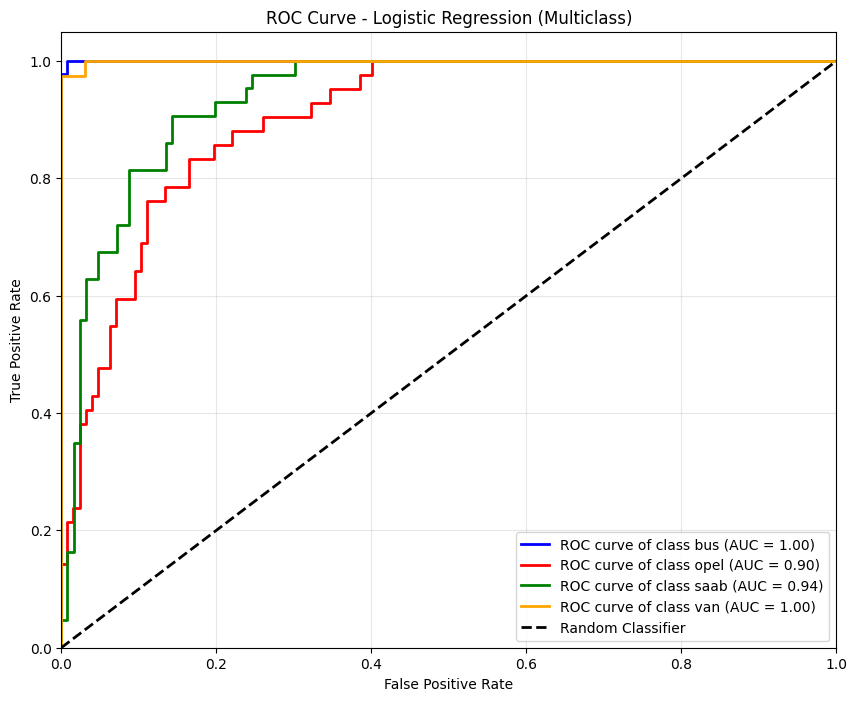

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Определить сетку гиперпараметров для cross-validation
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Параметр регуляризации
}



# Тут создаю модель логистической регрессии с заданными параметрами
lr = LogisticRegression(
    # multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)



# Выполняю поиск по сетке с cross-validation
grid_search = GridSearchCV(
    lr,
    param_grid,
    cv=5,  # пятикратная cross-validation
    scoring='f1_weighted',  # Используем взвешенный F1 для многоклассового обучения
    n_jobs=-1
)



grid_search.fit(X_train_scaled, y_train)

# Лучшая моделька)
best_lr = grid_search.best_estimator_
print( f"Best hyperparameters: {grid_search.best_params_}" )
print( f"Best cross-validation F1 score: {grid_search.best_score_:.4f}" )


# Predictions
y_pred = best_lr.predict(X_test_scaled)
y_pred_proba = best_lr.predict_proba(X_test_scaled)

# Evaluate on test set
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest F1 Score: {f1:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot ROC curve for multiclass
classes = best_lr.classes_
n_classes = len(classes)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})')




plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Multiclass)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()










In [106]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot
! pip install scikit-plot

### 2.2. PCA: explained variance plot

Apply the PCA to the train part of the data.

Build the explaided variance plot.

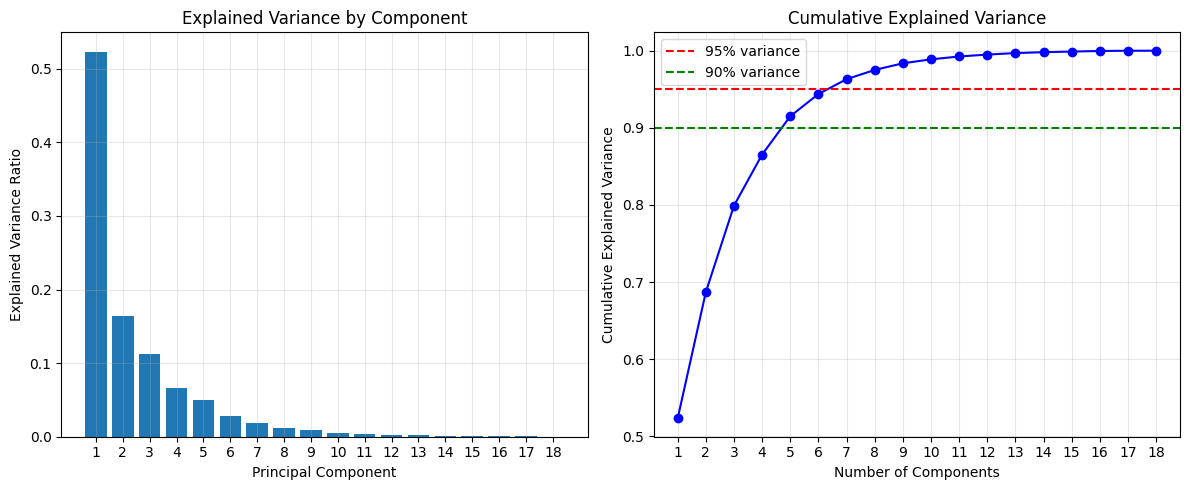

Explained variance ratio by component:
PC1: 0.5234 (cumulative: 0.5234)
PC2: 0.1637 (cumulative: 0.6871)
PC3: 0.1120 (cumulative: 0.7991)
PC4: 0.0663 (cumulative: 0.8654)
PC5: 0.0496 (cumulative: 0.9150)
PC6: 0.0288 (cumulative: 0.9438)
PC7: 0.0193 (cumulative: 0.9631)
PC8: 0.0120 (cumulative: 0.9751)
PC9: 0.0086 (cumulative: 0.9837)
PC10: 0.0051 (cumulative: 0.9888)
PC11: 0.0037 (cumulative: 0.9925)
PC12: 0.0025 (cumulative: 0.9950)
PC13: 0.0019 (cumulative: 0.9969)
PC14: 0.0012 (cumulative: 0.9981)
PC15: 0.0008 (cumulative: 0.9989)
PC16: 0.0007 (cumulative: 0.9996)
PC17: 0.0004 (cumulative: 1.0000)
PC18: 0.0000 (cumulative: 1.0000)

Number of components for 90% variance: 5
Number of components for 95% variance: 7


In [107]:
from sklearn.decomposition import PCA

# Применяю PCA ко всем элементам чтобы увидеть explained variance
pca_full = PCA()
pca_full.fit(X_train_scaled)

# График  explained variance
plt.figure(figsize=(12, 5))

# График  1ый: Individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
        pca_full.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
plt.grid(alpha=0.3)

# 2-ой график : Cumulative explained variance
plt.subplot(1, 2, 2)
cumulative_variance =np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label = '95% variance')
plt.axhline(y = 0.90, color = 'g', linestyle = '--', label = '90% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(range(1, len(cumulative_variance) + 1))

plt.tight_layout()
plt.show()

# Саммари
print("Explained variance ratio by component:")
for i, var in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} (cumulative: {cumulative_variance[i]:.4f})")

print(f"\nNumber of components for 90% variance: {np.argmax(cumulative_variance >= 0.90) + 1}")
print(f"Number of components for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")

### 2.3. PCA trasformation

Select the appropriate number of components.

Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train`, `val` and `test` parts.*

In [108]:
# Выбераем 7 компонентов, чтобы сохранить 95% дисперсии.
# Это  компромисс между уменьшением размерности и сохранением информации.
n_components = 7

# Данные должны быть нормализованы перед PCA, но мы то уже сделали это в разделе 2.0 ))))))))).
# Тогда мы применили StandardScaler, который и является правильной нормализацией для PCA.

# А вот и создадим PCA transformer с нашим количеством компонентов
pca = PCA(n_components=n_components, random_state=42)






# Тренируем и transform train and test
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original data shape: {X_train_scaled.shape}")
print(f"PCA-transformed data shape: {X_train_pca.shape}")
print(f"\nTotal explained variance with {n_components} components: {pca.explained_variance_ratio_.sum():.4f}")
print(f"Dimensionality reduction: {X_train_scaled.shape[1]} → {n_components} features") #снижение размерности




#  Почему нормализовать данные перед PCA?
# 1. PCA основан на дисперсии поэтму признаки с большими масштабами доминируют
# 2. StandardScaler гарантирует, что все признаки вносят равный вклад
# 3. Без нормализации признаки с большими значениями будут иметь непропорциональное влияние





Original data shape: (676, 18)
PCA-transformed data shape: (676, 7)

Total explained variance with 7 components: 0.9631
Dimensionality reduction: 18 → 7 features


Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.

### 2.4. Logistic regression on PCA-preprocessed data

* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.
* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best hyperparameters: {'C': 10}
Best cross-validation F1 score: 0.6201

Test F1 Score: 0.6276
Test Accuracy: 0.6331

--- Comparison ---
Without PCA - F1: 0.8367, Accuracy: 0.8402
With PCA    - F1: 0.6276, Accuracy: 0.6331
Difference  - F1: -0.2091, Accuracy: -0.2071


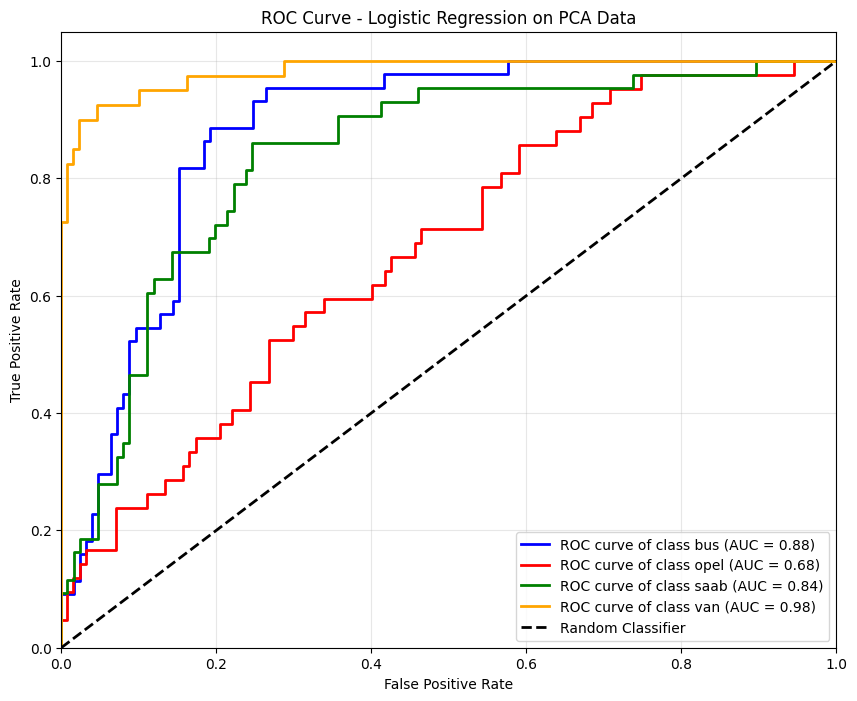

In [109]:
# Логистическая регрессия на данных, преобразованных с помощью PCA
param_grid_pca = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

lr_pca = LogisticRegression(
    # multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

# Поиск по сетке на данных PCA
grid_search_pca = GridSearchCV(
    lr_pca,
    param_grid_pca,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search_pca.fit(X_train_pca, y_train)

# Bestie
best_lr_pca = grid_search_pca.best_estimator_
print(f"Best hyperparameters: {grid_search_pca.best_params_}")
print(f"Best cross-validation F1 score: {grid_search_pca.best_score_:.4f}")



# Predictions
y_pred_pca =best_lr_pca.predict(X_test_pca)
y_pred_proba_pca = best_lr_pca.predict_proba(X_test_pca)



# Evaluate
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"\nTest F1 Score: {f1_pca:.4f}")
print(f"Test Accuracy: {accuracy_pca:.4f}")

#сравнение с non-PCA model
print(f"\n--- Comparison ---")
print(f"Without PCA - F1: {f1:.4f}, Accuracy: {accuracy:.4f}")
print(f"With PCA    - F1: {f1_pca:.4f}, Accuracy: {accuracy_pca:.4f}")
print(f"Difference  - F1: {f1_pca - f1:.4f}, Accuracy: {accuracy_pca - accuracy:.4f}")

# Plot ROC curve
y_test_bin_pca = label_binarize(y_test, classes=best_lr_pca.classes_)
n_classes_pca = len(best_lr_pca.classes_)



fpr_pca = dict()
tpr_pca = dict()
roc_auc_pca = dict()



for i in range(n_classes_pca):
    fpr_pca[i], tpr_pca[i], _ = roc_curve(y_test_bin_pca[:, i], y_pred_proba_pca[:, i])
    roc_auc_pca[i] = auc(fpr_pca[i], tpr_pca[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes_pca), colors):
    plt.plot(fpr_pca[i], tpr_pca[i], color=color, lw=2,
             label=f'ROC curve of class {best_lr_pca.classes_[i]} (AUC = {roc_auc_pca[i]:.2f})')



plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression on PCA Data')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()









### 2.5. Decision tree

* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Best max_depth:10
Best cross-validation F1 score:0.7034

Test F1 Score: 0.6951
Test Accuracy: 0.6923


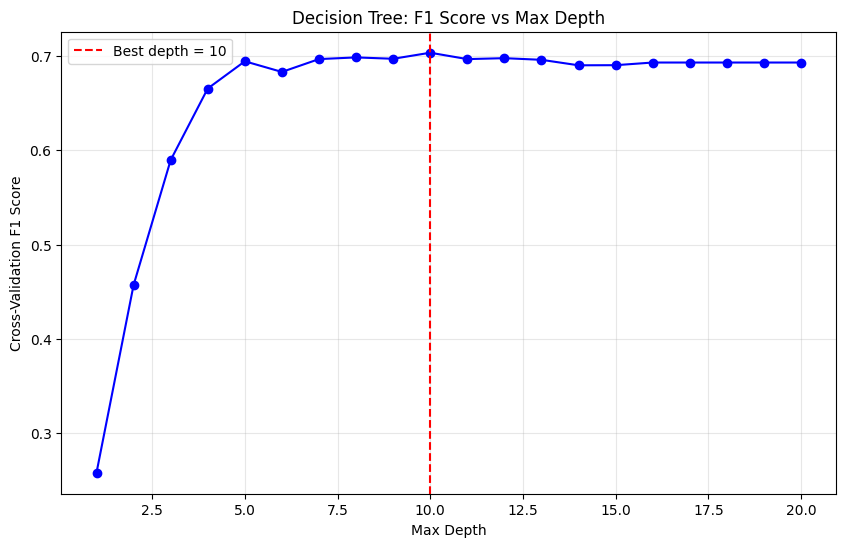

In [110]:
from sklearn.tree import DecisionTreeClassifier

# Поиск оптимальной глубины дерева с помощью советского перебора
param_grid_tree = {
    'max_depth':range(1, 21),  # Try depths from 1 to 20
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_tree = GridSearchCV(
    dt,
    param_grid_tree,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search_tree.fit(X_train_scaled, y_train)

# Besie)
best_dt = grid_search_tree.best_estimator_
print(f"Best max_depth:{grid_search_tree.best_params_['max_depth']}")
print(f"Best cross-validation F1 score:{grid_search_tree.best_score_:.4f}")



# Predictions
y_pred_dt = best_dt.predict(X_test_scaled)

# Evaluate
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
accuracy_dt = accuracy_score(y_test, y_pred_dt)




print(f"\nTest F1 Score: {f1_dt:.4f}")
print(f"Test Accuracy: {accuracy_dt:.4f}")




# Plot cross-validation scores vs depth
depths = [params['max_depth'] for params in grid_search_tree.cv_results_['params']]
mean_scores = grid_search_tree.cv_results_['mean_test_score']



plt.figure(figsize=(10, 6))
plt.plot(depths, mean_scores, 'bo-')
plt.axvline(x=grid_search_tree.best_params_['max_depth'], color='r',
            linestyle='--', label=f"Best depth = {grid_search_tree.best_params_['max_depth']}")
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validation F1 Score')
plt.title('Decision Tree: F1 Score vs Max Depth')
plt.legend()
plt.grid(alpha=0.3)
plt.show()









### 2.6. Bagging

Here starts the ensembling part. You need to use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ with step 5.

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

Training Bagging ensembles with Logistic Regression...
Training Bagging ensembles with Decision Trees...


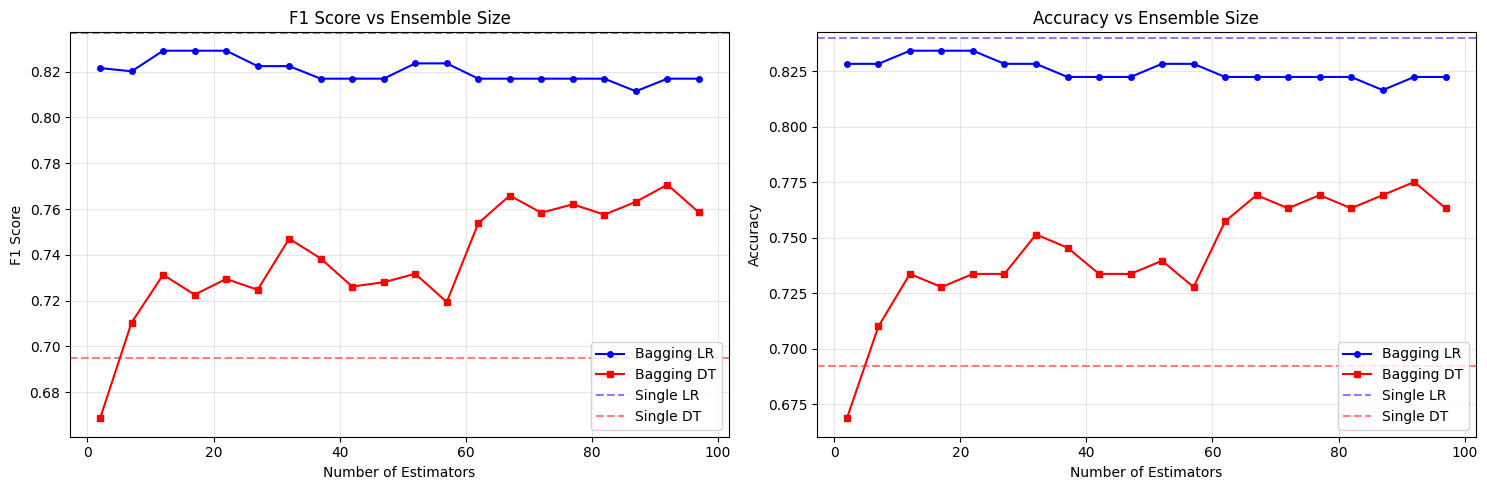


 Results 
Optimal ensemble size for Bagging LR: 12 (F1=0.8291)
Optimal ensemble size for Bagging DT: 92 (F1=0.7706)

Single LR F1: 0.8367
Best Bagging LR F1: 0.8291 (improvement: -0.0076)

Single DT F1: 0.6951
Best Bagging DT F1: 0.7706 (improvement: 0.0756)

 Analysis 
1. Bagging improves stability by reducing variance through averaging
2. For DT: Bagging significantly improves performance (trees have high variance)
3. For LR: Limited improvement (LR is already stable with low variance)
4. Optimal size stabilizes after ~20-40 estimators (diminishing returns)

5. Hyperparameters for DT in ensemble:
   - Trees in ensemble should be deep to capture patterns
   - Individual tree depth (10) may not be optimal for ensemble
   - Ensemble benefits from diverse trees, so max_depth could be higher


In [111]:
from sklearn.ensemble import BaggingClassifier


# Parameters for ensemble size variation
n_estimators_range = range(2, 101, 5)  # From 2 to 100 with step 5

# Куда закидываем результаты
bagging_lr_f1_scores = []
bagging_lr_acc_scores = []
bagging_dt_f1_scores = []
bagging_dt_acc_scores = []



# Bagging with Logistic Regression
print("Training Bagging ensembles with Logistic Regression...")
for n_est in n_estimators_range:
    bag_lr = BaggingClassifier(
        estimator=LogisticRegression(multi_class='multinomial', solver='saga',
              tol=1e-3, max_iter=500, C=10, random_state=42),
        n_estimators=n_est,
        random_state=42,
        n_jobs=-1
    )

    bag_lr.fit(X_train_scaled, y_train)
    y_pred_bag_lr = bag_lr.predict(X_test_scaled)


    bagging_lr_f1_scores.append(f1_score(y_test, y_pred_bag_lr, average='weighted'))
    bagging_lr_acc_scores.append(accuracy_score(y_test, y_pred_bag_lr))




# Bagging with Decision Trees
print("Training Bagging ensembles with Decision Trees...")
for n_est in n_estimators_range:
    bag_dt = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
        n_estimators=n_est,
        random_state=42,
        n_jobs=-1
    )
    bag_dt.fit(X_train_scaled, y_train)
    y_pred_bag_dt = bag_dt.predict(X_test_scaled)

    bagging_dt_f1_scores.append(f1_score(y_test, y_pred_bag_dt, average='weighted'))
    bagging_dt_acc_scores.append(accuracy_score(y_test, y_pred_bag_dt))


# График с результатами
fig, axes = plt.subplots(1, 2, figsize=(15, 5))



# F1 Score plot
axes[0].plot(n_estimators_range, bagging_lr_f1_scores, 'b-o', label='Bagging LR', markersize=4)
axes[0].plot(n_estimators_range, bagging_dt_f1_scores, 'r-s', label='Bagging DT', markersize=4)
axes[0].axhline(y=f1, color='b', linestyle='--', alpha=0.5, label='Single LR')
axes[0].axhline(y=f1_dt, color='r', linestyle='--', alpha=0.5, label='Single DT')
axes[0].set_xlabel('Number of Estimators')
axes[0].set_ylabel('F1 Score')
axes[0].set_title('F1 Score vs Ensemble Size')
axes[0].legend()
axes[0].grid(alpha=0.3)



# Accuracy plot
axes[1].plot(n_estimators_range, bagging_lr_acc_scores, 'b-o', label='Bagging LR', markersize=4)
axes[1].plot(n_estimators_range, bagging_dt_acc_scores, 'r-s', label='Bagging DT', markersize=4)
axes[1].axhline(y=accuracy, color='b', linestyle='--', alpha=0.5, label='Single LR')
axes[1].axhline(y=accuracy_dt, color='r', linestyle='--', alpha=0.5, label='Single DT')
axes[1].set_xlabel('Number of Estimators')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy vs Ensemble Size')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()



# Find optimal ensemble sizes
optimal_n_lr_f1 = n_estimators_range[np.argmax(bagging_lr_f1_scores)]
optimal_n_dt_f1 = n_estimators_range[np.argmax(bagging_dt_f1_scores)]



print(f"\n Results ")
print(f"Optimal ensemble size for Bagging LR: {optimal_n_lr_f1} (F1={max(bagging_lr_f1_scores):.4f})")
print(f"Optimal ensemble size for Bagging DT: {optimal_n_dt_f1} (F1={max(bagging_dt_f1_scores):.4f})")
print(f"\nSingle LR F1: {f1:.4f}")
print(f"Best Bagging LR F1: {max(bagging_lr_f1_scores):.4f} (improvement: {max(bagging_lr_f1_scores) - f1:.4f})")
print(f"\nSingle DT F1: {f1_dt:.4f}")
print(f"Best Bagging DT F1: {max(bagging_dt_f1_scores):.4f} (improvement: {max(bagging_dt_f1_scores) - f1_dt:.4f})")



print(f"\n Analysis ")
print("1. Bagging improves stability by reducing variance through averaging")
print("2. For DT: Bagging significantly improves performance (trees have high variance)")
print("3. For LR: Limited improvement (LR is already stable with low variance)")
print("4. Optimal size stabilizes after ~20-40 estimators (diminishing returns)")
print("\n5. Hyperparameters for DT in ensemble:")
print("   - Trees in ensemble should be deep to capture patterns")
print("   - Individual tree depth (10) may not be optimal for ensemble")
print("   - Ensemble benefits from diverse trees, so max_depth could be higher")

### 2.7. Random Forest

Now we will work with the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Training Random Forest with varying number of trees...


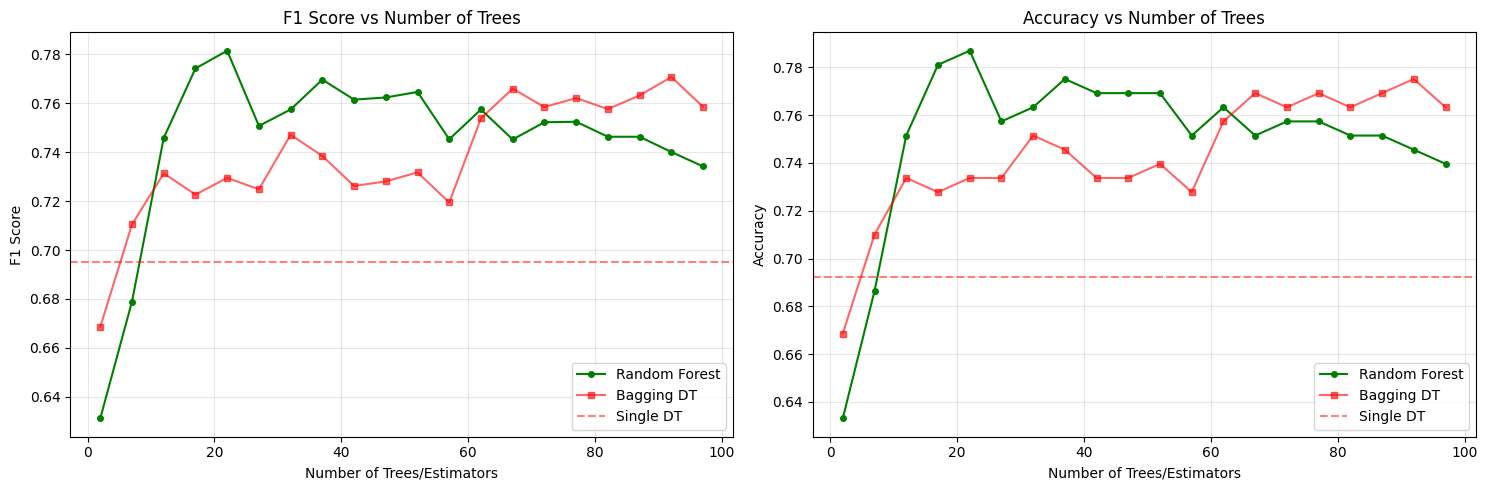


--- Results ---
Optimal number of trees for Random Forest: 22
Best Random Forest F1: 0.7814
Best Random Forest Accuracy: 0.7870

--- Comparison ---
Single DT:            F1=0.6951, Acc=0.6923
Bagging DT (n=92): F1=0.7706, Acc=0.7751
Random Forest (n=22): F1=0.7814, Acc=0.7870

--- Analysis ---
1. Optimal RF trees (22) vs Bagging DT (92):
   RF needs fewer trees because it adds randomness in feature selection
   This creates more diverse trees, reducing need for many estimators

2. Random Forest vs Bagging:
   - RF uses random feature subsets at each split (more diversity)
   - Bagging uses all features (less diversity, needs more trees)
   - RF performance: 0.7814, Bagging DT: 0.7706

3. Both methods show diminishing returns after ~22 trees


In [112]:
from sklearn.ensemble import RandomForestClassifier

# Test Random Forest with varying number of trees
n_trees_range = range(2, 101, 5)

rf_f1_scores = []
rf_acc_scores = []



print("Training Random Forest with varying number of trees...")
for n_trees in n_trees_range:
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)

    rf_f1_scores.append(f1_score(y_test, y_pred_rf, average='weighted'))
    rf_acc_scores.append(accuracy_score(y_test, y_pred_rf))

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))



# F1 Score plot
axes[0].plot(n_trees_range, rf_f1_scores, 'g-o', label='Random Forest', markersize=4)
axes[0].plot(n_estimators_range, bagging_dt_f1_scores, 'r-s', label='Bagging DT', markersize=4, alpha=0.6)
axes[0].axhline(y=f1_dt, color='r', linestyle='--', alpha=0.5, label='Single DT')
axes[0].set_xlabel('Number of Trees/Estimators')
axes[0].set_ylabel('F1 Score')
axes[0].set_title('F1 Score vs Number of Trees')
axes[0].legend()
axes[0].grid(alpha=0.3)



# Accuracy plot
axes[1].plot(n_trees_range, rf_acc_scores, 'g-o', label='Random Forest', markersize=4)
axes[1].plot(n_estimators_range, bagging_dt_acc_scores, 'r-s', label='Bagging DT', markersize=4, alpha=0.6)
axes[1].axhline(y=accuracy_dt, color='r', linestyle='--', alpha=0.5, label='Single DT')
axes[1].set_xlabel('Number of Trees/Estimators')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy vs Number of Trees')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()




# Find optimal number of trees
optimal_n_rf = n_trees_range[np.argmax(rf_f1_scores)]

print(f"\n--- Results ---")
print(f"Optimal number of trees for Random Forest: {optimal_n_rf}")
print(f"Best Random Forest F1: {max(rf_f1_scores):.4f}")
print(f"Best Random Forest Accuracy: {rf_acc_scores[np.argmax(rf_f1_scores)]:.4f}")

print(f"\n--- Comparison ---")
print(f"Single DT:            F1={f1_dt:.4f}, Acc={accuracy_dt:.4f}")
print(f"Bagging DT (n={optimal_n_dt_f1}): F1={max(bagging_dt_f1_scores):.4f}, Acc={bagging_dt_acc_scores[np.argmax(bagging_dt_f1_scores)]:.4f}")
print(f"Random Forest (n={optimal_n_rf}): F1={max(rf_f1_scores):.4f}, Acc={rf_acc_scores[np.argmax(rf_f1_scores)]:.4f}")

print(f"\n--- Analysis ---")
print(f"1. Optimal RF trees ({optimal_n_rf}) vs Bagging DT ({optimal_n_dt_f1}):")
if optimal_n_rf < optimal_n_dt_f1:
    print(f"   RF needs fewer trees because it adds randomness in feature selection")
    print(f"   This creates more diverse trees, reducing need for many estimators")
else:
    print(f"   Both methods stabilize around similar number of estimators")

print(f"\n2. Random Forest vs Bagging:")
print(f"   - RF uses random feature subsets at each split (more diversity)")
print(f"   - Bagging uses all features (less diversity, needs more trees)")
print(f"   - RF performance: {max(rf_f1_scores):.4f}, Bagging DT: {max(bagging_dt_f1_scores):.4f}")

print(f"\n3. Both methods show diminishing returns after ~{max(20, min(optimal_n_rf, optimal_n_dt_f1))} trees")

### 2.8. Learning curve

Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected. First train it on first part, then on first and second parts combined (so the train size in increased by 2 times), first 3 parts and so on.

* You may use `sklearn`'s [readymade function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html). But note that you need to adjust parameters of this function appropriately.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score vs dataset size).

* Analyse the final plot. Can you make any conlusions using it?

Computing learning curves...
  Processing Logistic Regression...
  Processing Decision Tree...
  Processing Random Forest...


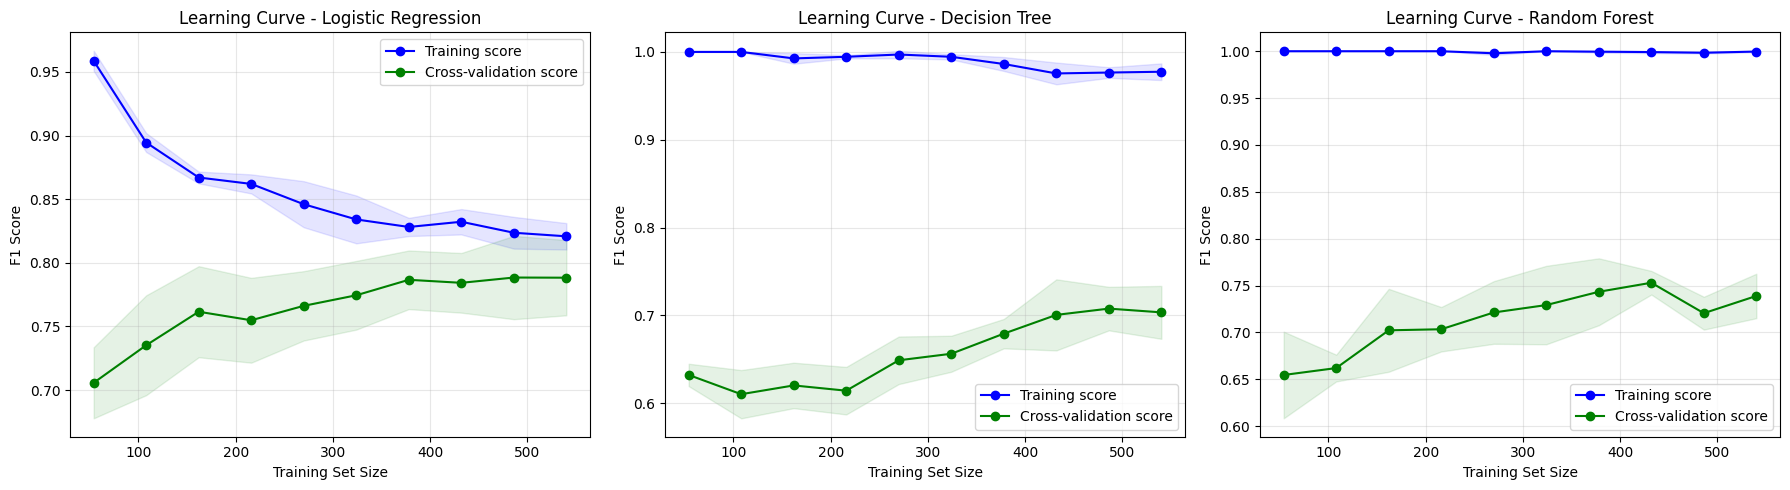



Evaluating on test set with increasing training sizes...


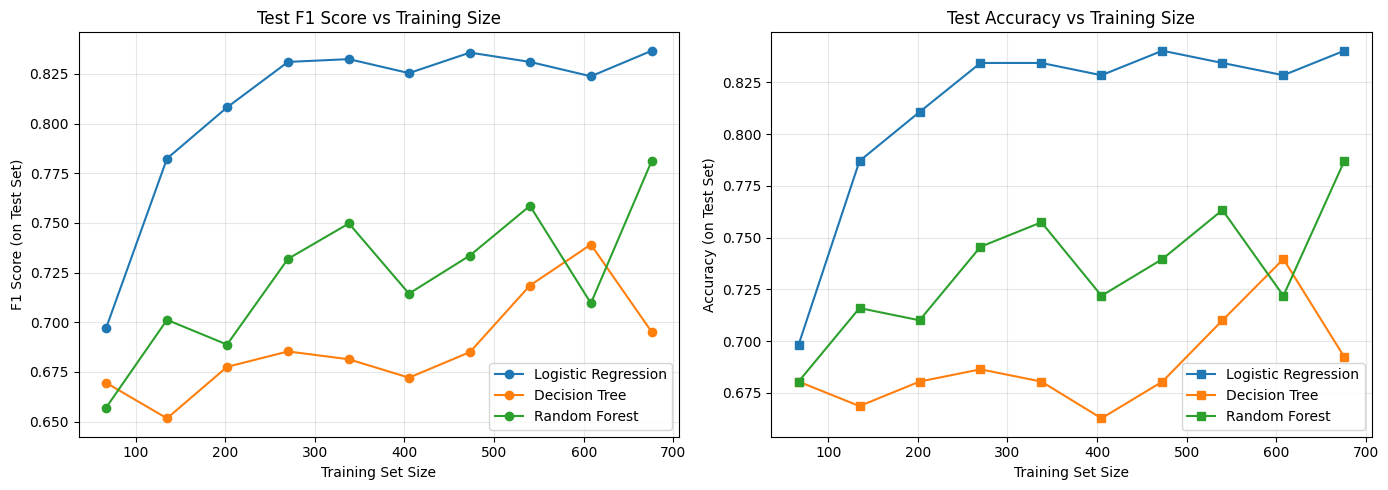

In [113]:
from sklearn.model_selection import learning_curve

# Define models with optimal hyperparameters
models = {
    'Logistic Regression': LogisticRegression(
        #multi_class='multinomial',
    solver='saga',
    tol=1e-3, max_iter=500, C=10, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=22, random_state=42, n_jobs=-1)
}

# Train sizes (10 splits)
train_sizes = np.linspace(0.1, 1.0, 10)

# Storage for results
results = {}

print("Computing learning curves...")

for name, model in models.items():
    print(f"  Processing {name}...")
    train_sizes_abs, train_scores, test_scores = learning_curve(
        model, X_train_scaled, y_train,
        train_sizes=train_sizes,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        random_state=42
    )



    results[name] = {
        'train_sizes': train_sizes_abs,
        'train_scores_mean': train_scores.mean(axis=1),
        'train_scores_std': train_scores.std(axis=1),
        'test_scores_mean': test_scores.mean(axis=1),
        'test_scores_std': test_scores.std(axis=1)
    }




# Plot learning curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx]

    # Plot training and validation scores
    ax.plot(result['train_sizes'], result['train_scores_mean'], 'o-',
            label='Training score', color='blue')
    ax.fill_between(result['train_sizes'],

    result['train_scores_mean'] - result['train_scores_std'],
    result['train_scores_mean'] + result['train_scores_std'],
    alpha=0.1, color='blue')

    ax.plot(result['train_sizes'], result['test_scores_mean'], 'o-',
            label='Cross-validation score', color='green')
    ax.fill_between(result['train_sizes'],
        result['test_scores_mean'] - result['test_scores_std'],
        result['test_scores_mean'] + result['test_scores_std'],
        alpha=0.1, color='green')

    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('F1 Score')
    ax.set_title(f'Learning Curve - {name}')
    ax.legend(loc='best')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Now evaluate on the actual test set with increasing training sizes
print("\n\nEvaluating on test set with increasing training sizes...")
test_f1_results = {name: [] for name in models.keys()}
test_acc_results = {name: [] for name in models.keys()}




for train_size in train_sizes:
    n_samples = int(len(X_train_scaled) * train_size)
    X_train_subset = X_train_scaled[:n_samples]
    y_train_subset = y_train[:n_samples]




    for name, model in models.items():
        # Clone and train model
        from sklearn.base import clone
        model_clone = clone(model)
        model_clone.fit(X_train_subset, y_train_subset)



        # Predict on test set
        y_pred = model_clone.predict(X_test_scaled)
        test_f1_results[name].append(f1_score(y_test, y_pred, average='weighted'))
        test_acc_results[name].append(accuracy_score(y_test, y_pred))

# Plot test set performance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))



# F1 Score
for name in models.keys():
    actual_sizes = [int(len(X_train_scaled) * ts) for ts in train_sizes]
    axes[0].plot(actual_sizes, test_f1_results[name], 'o-', label=name, markersize=6)



axes[0].set_xlabel('Training Set Size')
axes[0].set_ylabel('F1 Score (on Test Set)')
axes[0].set_title('Test F1 Score vs Training Size')
axes[0].legend()
axes[0].grid(alpha=0.3)



# Accuracy
for name in models.keys():
    actual_sizes = [int(len(X_train_scaled) * ts) for ts in train_sizes]
    axes[1].plot(actual_sizes, test_acc_results[name], 's-', label=name, markersize=6)



axes[1].set_xlabel('Training Set Size')
axes[1].set_ylabel('Accuracy (on Test Set)')
axes[1].set_title('Test Accuracy vs Training Size')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()





# Анализ

## 1. Все модели улучшаются с увеличением объема данных, но с разной скоростью

## 2. Логистическая регрессия:
- **Быстро выходит на плато** (простая модель, ограниченная емкость)
- **Небольшой разрыв** между обучением и валидацией (низкая дисперсия)

## 3. Дерево решений:
- **Больший разрыв** между обучением и валидацией (склонность к переобучению)
- **Сильнее выигрывает** от дополнительных данных

## 4. Случайный лес:
- **Наилучшая общая производительность**
- **Более стабилен**, чем одиночное дерево (ансамблевый эффект)
- **Продолжает улучшаться** с увеличением данных

## 5. Вывод:
При текущем размере набора данных **случайный лес показывает лучшие результаты**

Больший объем данных, вероятно, поможет всем моделям, **особенно древовидным**

### 2.9. Boosting

Apply [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to this problem.

Find optimal hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or RandomizedSearchCV.

Hyperparameters to consider:
* depth of each tree
* number of decision trees
* learning rate

Performing RandomizedSearchCV for GradientBoosting...
This may take a few minutes...

Fitting 5 folds for each of 50 candidates, totalling 250 fits

--- Best Hyperparameters ---
max_depth: 3
n_estimators: 178
learning_rate: 0.1650
subsample: 0.6372
min_samples_split: 3

Best cross-validation F1 score: 0.7811

--- Test Set Performance ---
F1 Score: 0.7739
Accuracy: 0.7751

--- Comparison with Other Models ---
Logistic Regression:  F1=0.8367, Acc=0.8402
Decision Tree:        F1=0.6951, Acc=0.6923
Random Forest:        F1=0.7814, Acc=0.7870
Gradient Boosting:    F1=0.7739, Acc=0.7751


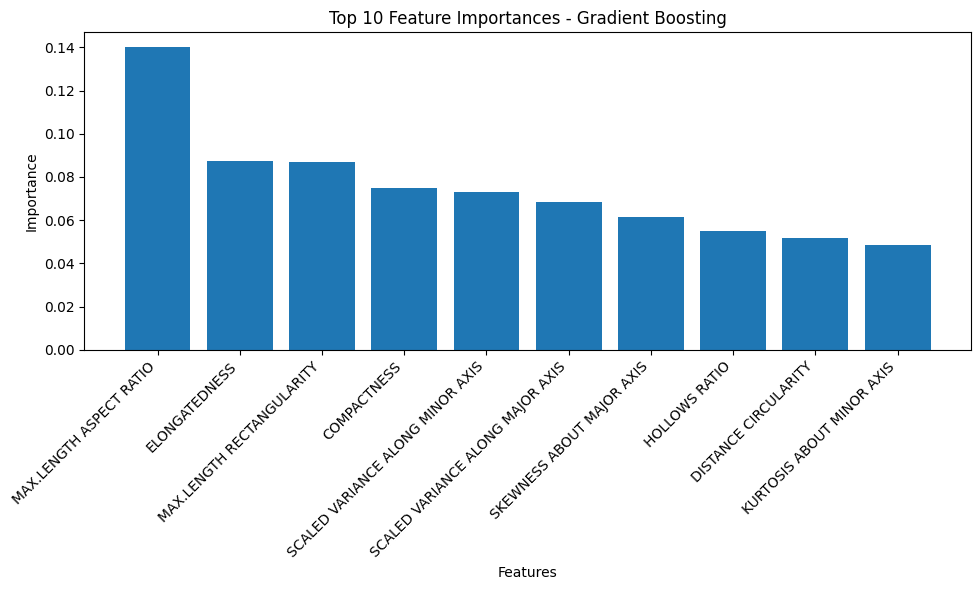


--- Analysis ---
Gradient Boosting builds trees sequentially, each correcting errors of previous ones
Key hyperparameters:
  - max_depth (3): Controls tree complexity
  - n_estimators (178): Number of sequential trees
  - learning_rate (0.1650): Step size for corrections

Trade-off: Lower learning rate needs more estimators but may generalize better


In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'max_depth': randint(3, 15),           #  Depth of each tree
    'n_estimators': randint(50, 300),       #  Number of boosting stages
    'learning_rate': uniform(0.01, 0.3),   # Learning rate (0.01 to 0.31)
    'subsample': uniform(0.6, 0.4),     # Fraction of samples (0.6 to 1.0)
    'min_samples_split': randint(2, 20),   # Minimum samples to split
}

print("Performing RandomizedSearchCV for GradientBoosting...")
print("This may take a few minutes...\n")




# делаем GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)


# RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb,
    param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_scaled, y_train)

# Bestie)
best_gb = random_search.best_estimator_
print(f"\n--- Best Hyperparameters ---")
print(f"max_depth: {random_search.best_params_['max_depth']}")
print(f"n_estimators: {random_search.best_params_['n_estimators']}")
print(f"learning_rate: {random_search.best_params_['learning_rate']:.4f}")
print(f"subsample: {random_search.best_params_['subsample']:.4f}")
print(f"min_samples_split: {random_search.best_params_['min_samples_split']}")
print(f"\nBest cross-validation F1 score: {random_search.best_score_:.4f}")



# Predictions
y_pred_gb = best_gb.predict(X_test_scaled)

# Evaluate
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
accuracy_gb = accuracy_score(y_test, y_pred_gb)



print(f"\n--- Test Set Performance ---")
print(f"F1 Score: {f1_gb:.4f}")
print(f"Accuracy: {accuracy_gb:.4f}")

# Compare with other models
print(f"\n--- Comparison with Other Models ---")
print(f"Logistic Regression:  F1={f1:.4f}, Acc={accuracy:.4f}")
print(f"Decision Tree:        F1={f1_dt:.4f}, Acc={accuracy_dt:.4f}")
print(f"Random Forest:        F1={max(rf_f1_scores):.4f}, Acc={max(rf_acc_scores):.4f}")
print(f"Gradient Boosting:    F1={f1_gb:.4f}, Acc={accuracy_gb:.4f}")




# Feature importance
feature_importance = best_gb.feature_importances_
feature_names = data_clean.columns



plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1][:10]  # Top 10 features
plt.bar(range(10), feature_importance[indices])
plt.xticks(range(10), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.tight_layout()
plt.show()



print("\n--- Analysis ---")
print("Gradient Boosting builds trees sequentially, each correcting errors of previous ones")
print("Key hyperparameters:")
print(f"  - max_depth ({random_search.best_params_['max_depth']}): Controls tree complexity")
print(f"  - n_estimators ({random_search.best_params_['n_estimators']}): Number of sequential trees")
print(f"  - learning_rate ({random_search.best_params_['learning_rate']:.4f}): Step size for corrections")
print("\nTrade-off: Lower learning rate needs more estimators but may generalize better")